<a href="https://colab.research.google.com/github/Yazmaz98/data-stream/blob/master/time_series_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install river
import pandas as pd


     |████████████████████████████████| 2.0 MB 4.4 MB/s 


In [ ]:
import river
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from river.time_series import Forecaster
from river import time_series
from statsmodels.tsa.stattools import adfuller, kpss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('output.csv', index_col=0)
df.head()


,x
0,2858.875000
1,2858.620117
2,2858.620117
3,2858.620117
4,2858.875000


In [ ]:
df = pd.DataFrame()
df

""


In [ ]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")

idx = pd.date_range(current_time, periods=len(df), freq="S")
idx=list(idx)
df['Datetime'] = pd.to_datetime(idx)
df = df.set_index('Datetime')
df.head()

,x
Datetime,
2022-03-31 06:45:12,2858.875000
2022-03-31 06:45:13,2858.620117
2022-03-31 06:45:14,2858.620117
2022-03-31 06:45:15,2858.620117
2022-03-31 06:45:16,2858.875000


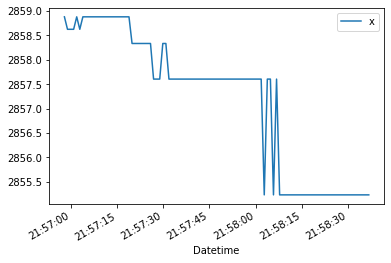

In [ ]:
df.plot()

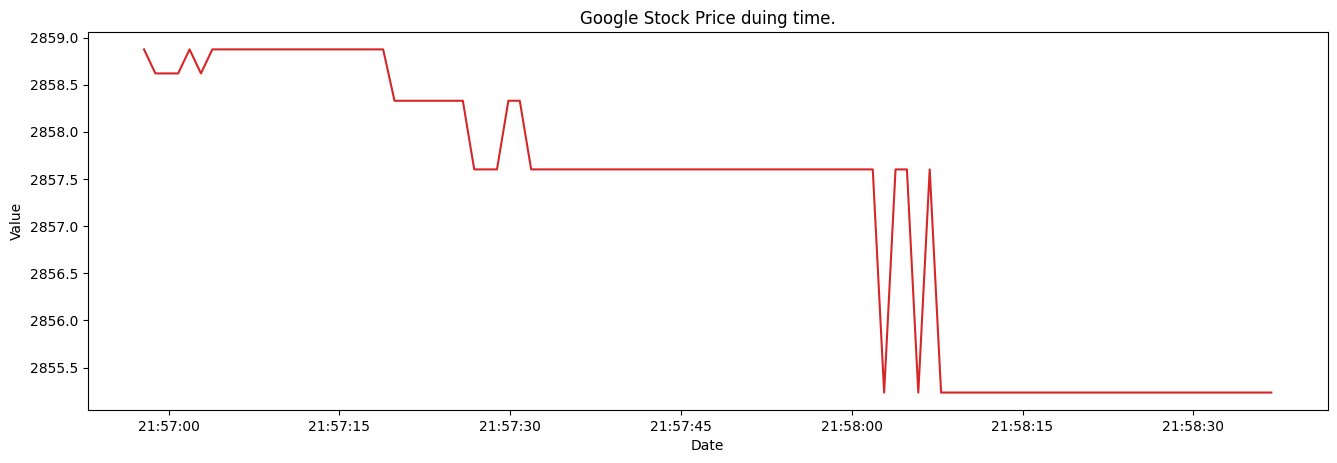

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.x, title='Google Stock Price duing time.')   

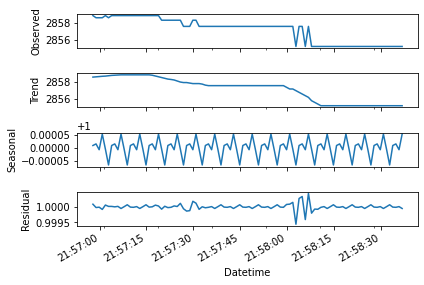

In [ ]:
decompfreq = 6
result_mul = seasonal_decompose(df, model='multiplicative', freq=decompfreq,  extrapolate_trend='freq')
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()
result_mul.plot()

plt.show()

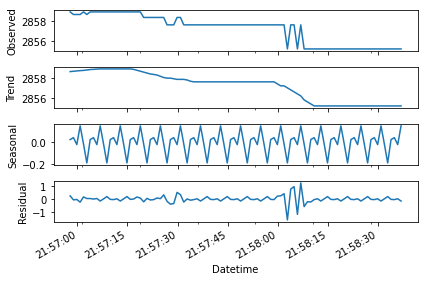

In [ ]:
result2 = seasonal_decompose(df, model='additive',  freq=decompfreq,extrapolate_trend='freq' )
df_reconstructed = pd.concat([result2.seasonal, result2.trend, result2.resid, result2.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()
result2.plot()
plt.show()

In [ ]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [ ]:
ad_test(df['x'])

1. ADF :  -0.2533522162691952
2. P-Value :  0.9318561391481173
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 97
5. Critical Values :
	 1% :  -3.4996365338407074
	 5% :  -2.8918307730370025
	 10% :  -2.5829283377617176


Non stationnary

In [ ]:
def kpss_test(df):
    result = kpss(df, regression='c')
    print('\nKPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

In [ ]:
kpss_test(df['x'])


KPSS Statistic: 0.798424
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


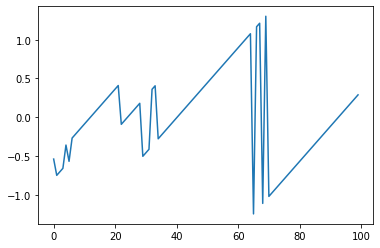

In [ ]:
#How to detrend a time serie
# Using scipy: Subtract the line of best fit
from scipy import signal
detrend = signal.detrend(df['x'])
plt.plot(detrend)

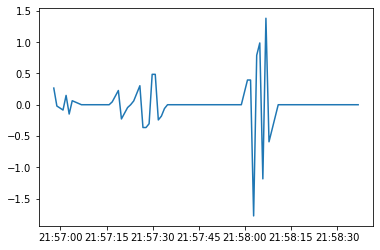

In [ ]:
result_mul = seasonal_decompose(df['x'], model='multiplicative',freq=decompfreq, extrapolate_trend='freq')
detrended = df['x'] - result_mul.trend
plt.plot(detrended)

[]

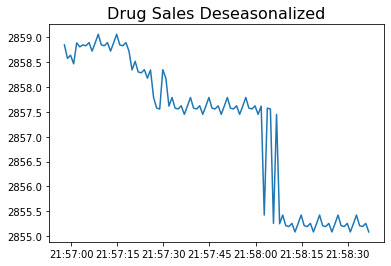

In [ ]:
result_mul = seasonal_decompose(df['x'], model='multiplicative',freq=decompfreq, extrapolate_trend='freq')
# Deseasonalize
deseasonalized = df['x'] / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


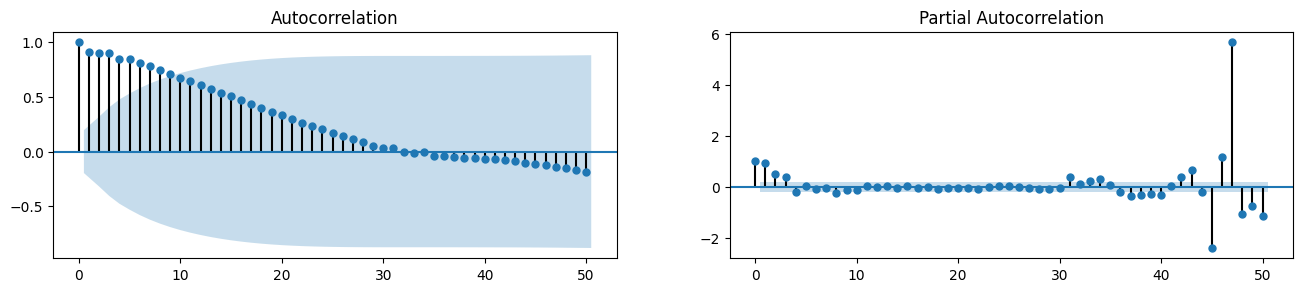

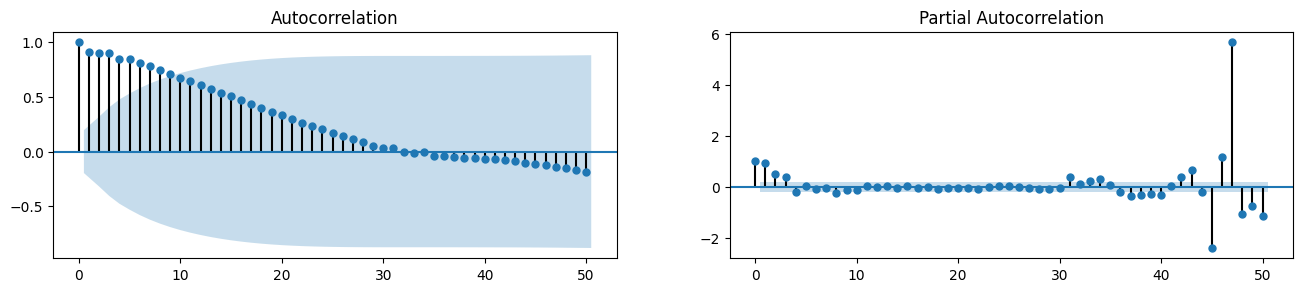

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['x'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['x'].tolist(), lags=50, ax=axes[1])

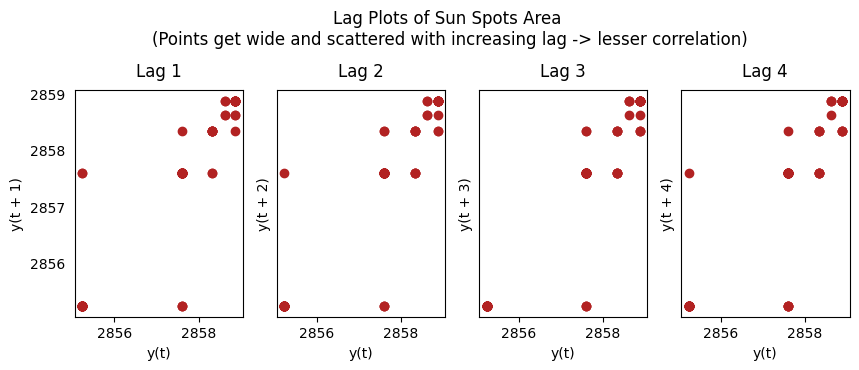

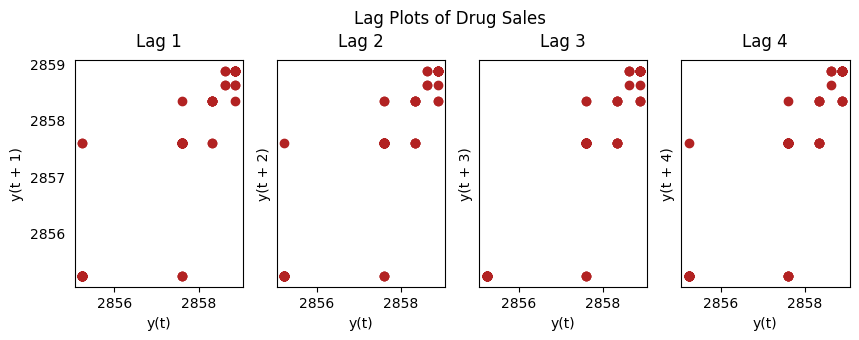

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['x'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['x'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

Datetime
2022-03-30 21:56:57.843958            NaN
2022-03-30 21:56:58.843958            NaN
2022-03-30 21:56:59.843958    2858.722070
2022-03-30 21:57:00.843958    2858.705078
2022-03-30 21:57:01.843958    2858.705078
2022-03-30 21:57:02.843958    2858.747559
2022-03-30 21:57:03.843958    2858.790039
2022-03-30 21:57:04.843958    2858.832520
2022-03-30 21:57:05.843958    2858.832520
2022-03-30 21:57:06.843958    2858.875000
2022-03-30 21:57:07.843958    2858.875000
2022-03-30 21:57:08.843958    2858.875000
2022-03-30 21:57:09.843958    2858.875000
2022-03-30 21:57:10.843958    2858.875000
2022-03-30 21:57:11.843958    2858.875000
2022-03-30 21:57:12.843958    2858.875000
2022-03-30 21:57:13.843958    2858.875000
2022-03-30 21:57:14.843958    2858.875000
2022-03-30 21:57:15.843958    2858.875000
2022-03-30 21:57:16.843958    2858.875000
Name: x, dtype: float64


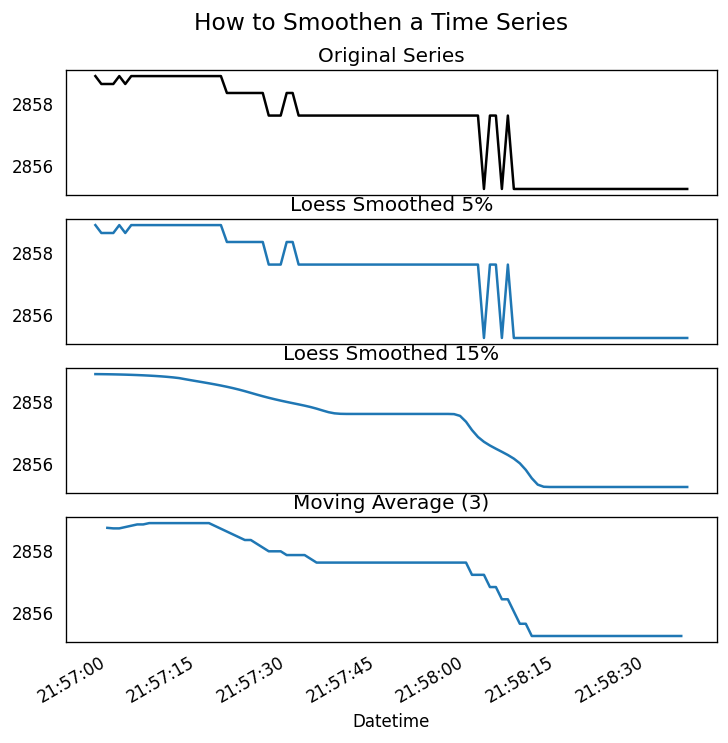

In [ ]:
#Why and How to smoothen a time series
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average
df_ma = df['x'].rolling(5, center=True, closed='both').mean()
print(df_ma.head(20))
# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df['x'], np.arange(len(df['x'])), frac=0.05)[:, 1], index=df['x'].index, columns=['x'])
df_loess_15 = pd.DataFrame(lowess(df['x'], np.arange(len(df['x'])), frac=0.30)[:, 1], index=df['x'].index, columns=['x'])

# # Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df['x'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['x'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['x'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order=(0, 1, 1)) 
results_ARIMA = model.fit()
results_ARIMA.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.x   No. Observations:                   99
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -56.446
Method:                       css-mle   S.D. of innovations              0.427
Date:                Wed, 30 Mar 2022   AIC                            118.893
Time:                        22:30:47   BIC                            126.678
Sample:                    03-30-2022   HQIC                           122.043
                         - 03-30-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0368      0.015     -2.410      0.018      -0.067      -0.007
ma.L1.D.x     -0.6506      0.059    -10.987      0.000      -0.767      -0.535
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5371           +0.0000j            1.5371            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
results_ARIMA.forecast(3)[0]

array([2855.12970135, 2855.09286844, 2855.05603553])

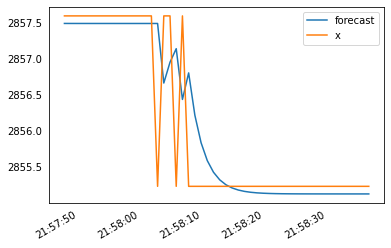

In [ ]:
results_ARIMA.plot_predict(start=50)
plt.show()

River

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1858.551567396615
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1529.7410195647726
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:241.37197537359626
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:220.3026406153229
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:218.70860933065535
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:197.8437276540846
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:222.46564467245506
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:222.41500668317394
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1709.7888605039968
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1403.6214299861535
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:217.4387447748275
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:197.08316835653272
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:206.16373439742512
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:198.4026083845563
ARIMA(0, 0, 1)x(1, 1, 0,

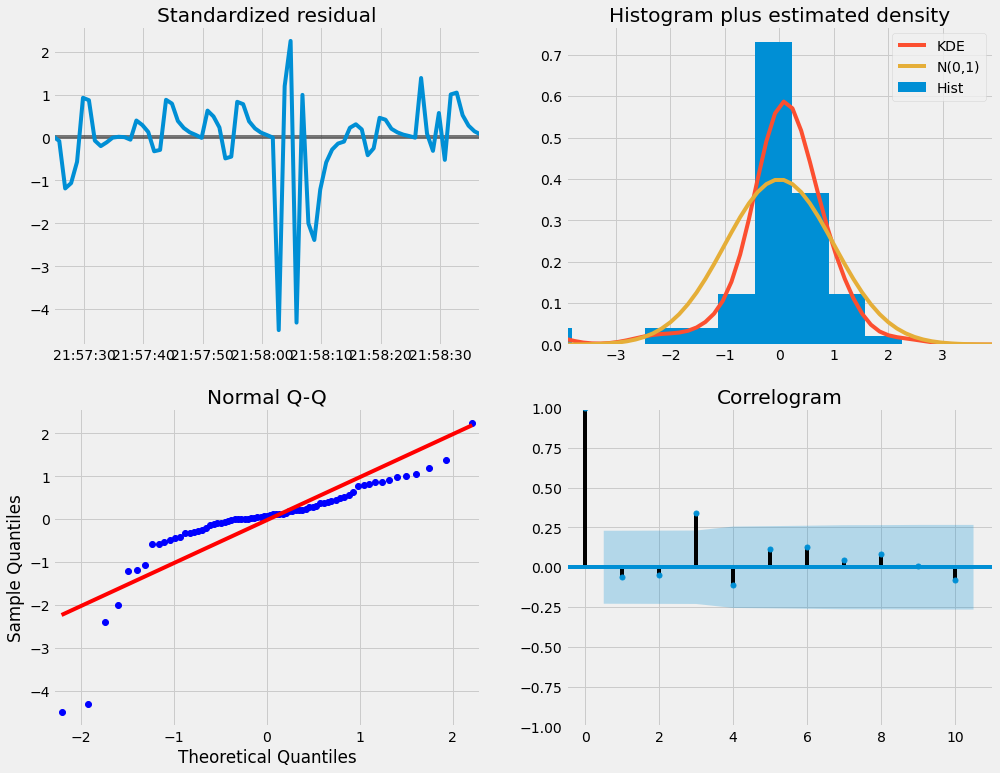

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
y=df['x']
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
y[-10]

2855.2351074219

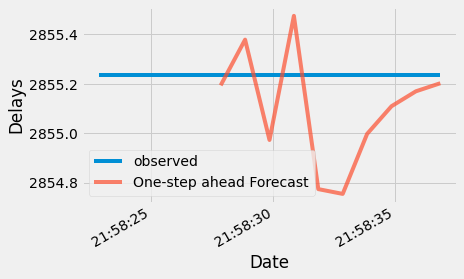

The Mean Squared Error of our forecasts is 0.07


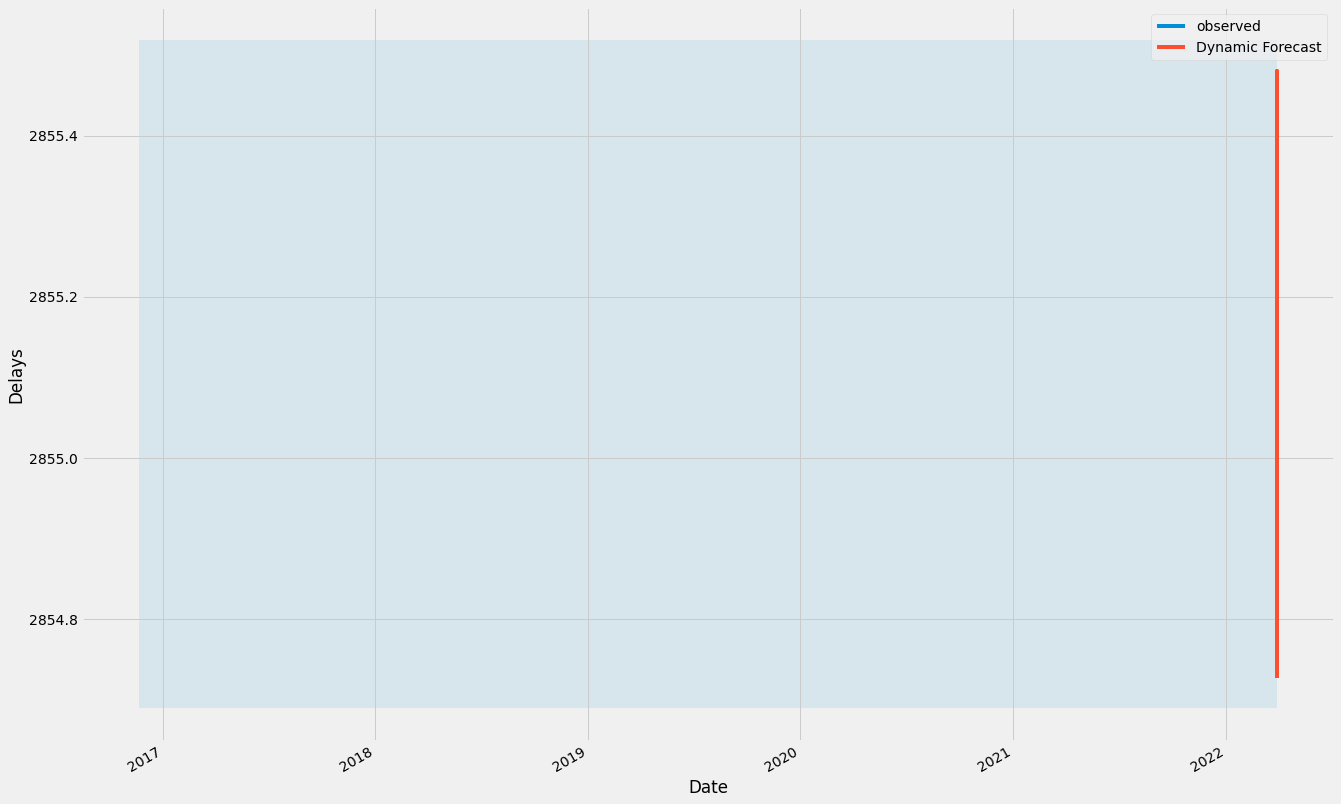

The Mean Squared Error of our forecasts is 0.17
2022-03-30 21:58:37.843958    2856.118328
2022-03-30 21:58:38.843958    2855.586129
2022-03-30 21:58:39.843958    2856.088910
2022-03-30 21:58:40.843958    2856.137617
2022-03-30 21:58:41.843958    2855.905037
2022-03-30 21:58:42.843958    2856.367961
2022-03-30 21:58:43.843958    2855.779477
2022-03-30 21:58:44.843958    2855.823553
2022-03-30 21:58:45.843958    2855.869428
2022-03-30 21:58:46.843958    2855.904302
2022-03-30 21:58:47.843958    2855.945034
2022-03-30 21:58:48.843958    2855.984575
2022-03-30 21:58:49.843958    2856.013021
2022-03-30 21:58:50.843958    2855.620948
2022-03-30 21:58:51.843958    2855.977315
2022-03-30 21:58:52.843958    2856.007062
2022-03-30 21:58:53.843958    2855.813518
2022-03-30 21:58:54.843958    2856.162796
2022-03-30 21:58:55.843958    2855.697307
2022-03-30 21:58:56.843958    2855.723052
2022-03-30 21:58:57.843958    2855.753115
2022-03-30 21:58:58.843958    2855.772906
2022-03-30 21:58:59.843958  

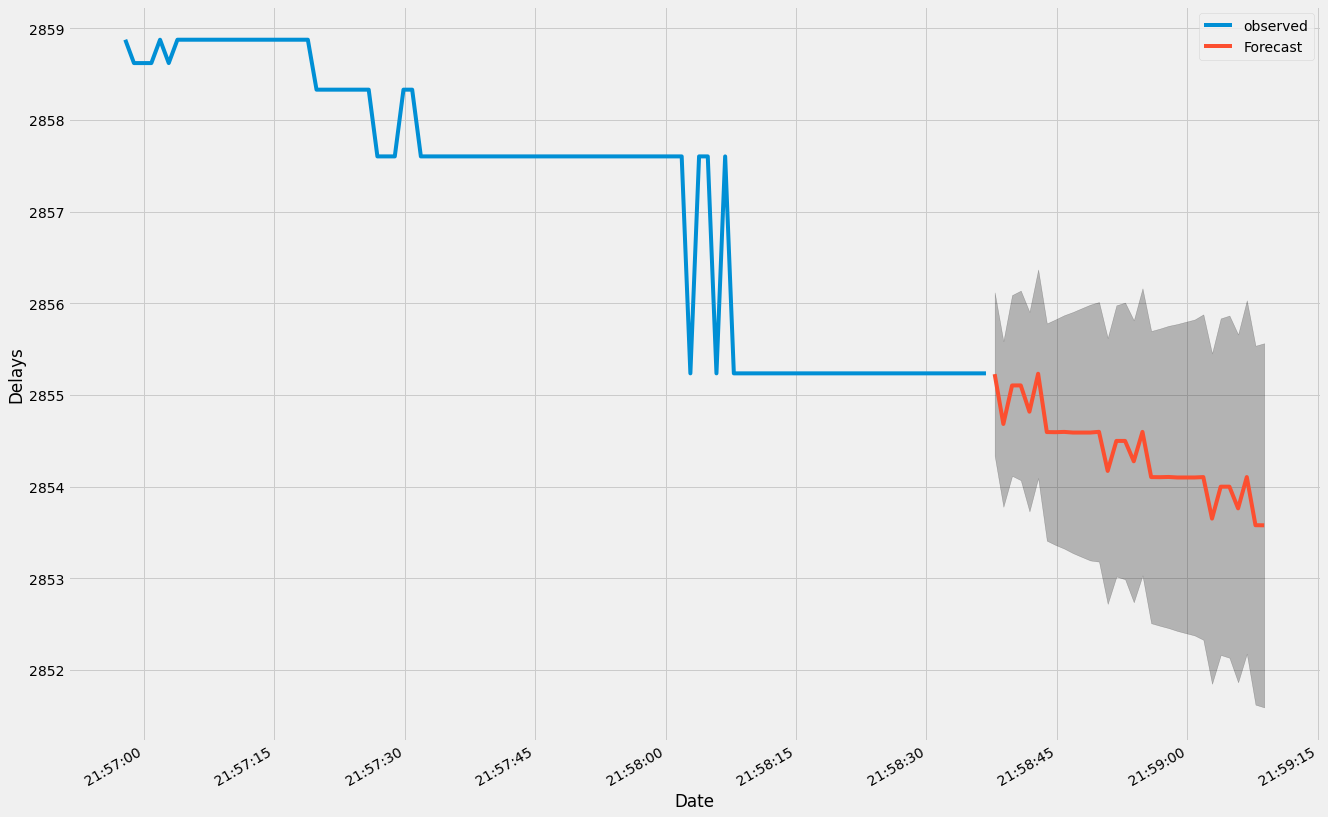

In [ ]:
pred = results.get_prediction(start=pd.to_datetime(y.index[-10]), dynamic=False)
pred_ci = pred.conf_int()

ax = y[y.index[-15]:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.set_xlabel('Date')
ax.set_ylabel('Delays')
plt.legend()

plt.show()

y_forecasted = pred.predicted_mean
y_truth = y[-10:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

pred_dynamic = results.get_prediction(start=pd.to_datetime(y.index[-10]), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y[y.index[-15]:].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2021-11-20 00:00:00'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Delays')

plt.legend()
plt.show()

y_forecasted = pred_dynamic.predicted_mean
y_truth = y[-10:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=32)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
print(pred_ci.iloc[:, 1])

ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Delays')

plt.legend()
plt.show()

river

In [ ]:
from river import datasets
from river import metrics
from river import time_series

model = time_series.HoltWinters(
    alpha=0.3,
    beta=0.3,
    gamma=0.3,
    multiplicative=True)

metric = metrics.MAE()
x, y =[], []
stream =list(df['x'])
for i in range(len(df)-1):
  x.append(df.iloc[i])
  y.append(df.iloc[i+1])
time_series.evaluate(x,y , model,
                      metric,
                      horizon=2,
                      grace_period=12
                      )

TypeError: ignored